In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
from totalhuman.model_zoo.get_models import get_detection_model, get_attrib_model, get_pose_model
from totalhuman.model_zoo.model_tracker.bytetracker import ByteTracker

from totalhuman.human.get_result import get_detection,get_gender, get_pose, get_tracking

from totalhuman.data.image import read_image
from totalhuman.utils.utils_detection.draw_result import draw_box
from totalhuman.utils.utils_attribute.gender_util import draw_results,draw_detect_bboxes,draw_detect_infer,crop_box
from totalhuman.utils.utils_tracker.utils_tracking import tracking_video,tracking_video_pose
from totalhuman.utils.utils_pose.pose_util import draw_pose,draw_pose_human

# Detection Example

In [4]:
# detection_name='yolov7'
# detection_path = "Human/Models/detection/yolov7.onnx"
# detection_path = "Human/Models/detection/yolov7.v8.trt"
# detection_path = ["Human/Models/detection/yolov7.xml",
#                 "Human/Models/detection/yolov7.bin"]

detection_name='yolox'
detection_path = "Human/Models/detection/yolox_m.onnx"

# default
conf_thres = 0.55
iou_thres = 0.45
# img_size(640,640) / stride 32 / classes 80 / agnostic_nms False / multi_label True / category = COCO_CATEGORY (utils.utils_detection.yolo_const)

detection_model = get_detection_model(detection_name,detection_path,conf_thres=conf_thres,iou_thres=iou_thres)

providers: ['CUDAExecutionProvider']
yolox onnx loaded


In [5]:
input_path = "sample_pose.jpg"
img = read_image(input_path)

### type 1. human class

In [6]:
human = get_detection(detection_model,img,person=True)

In [7]:
human

{'bboxes': array([[292.28079224,  54.71238327, 403.4369812 , 376.63418579],
        [122.6840744 ,  49.13888168, 242.00714111, 402.50161743],
        [ 23.09683037, 210.18377686, 141.50895691, 526.43530273],
        [359.91110229, 204.40316772, 582.5378418 , 586.01983643],
        [195.18388367, 208.18125916, 346.57922363, 574.51373291],
        [421.42016602,  26.90886307, 574.70709229, 391.43795776]]),
 'scores': array([0.94437015, 0.94280535, 0.93152863, 0.93146104, 0.90448976,
        0.88442314]),
 'labels': array([0., 0., 0., 0., 0., 0.])}

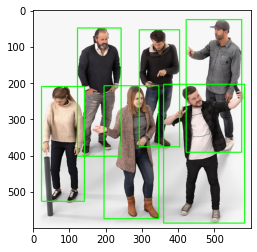

In [8]:
dimg = img.copy()
dimg = draw_box(dimg,human['bboxes'],line_w=2,color=(0,255,0))
plt.imshow(dimg)

### type 2. inference model

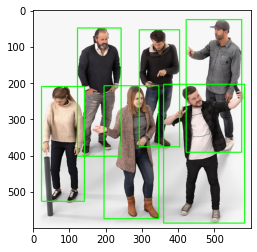

In [9]:
bboxes, scores,labels = detection_model.detect(img,person=True) # img is array image or path

dimg = img.copy()
dimg = draw_box(dimg,bboxes,line_w=2,color=(0,255,0))
plt.imshow(dimg)

### coco evaluation

In [9]:
from totalhuman.eval.coco import coco_eval, get_map

In [19]:
data_dir = "coco2017/images/"
resFile = "./example_result.json"
coco_eval(detection_model,data_dir,resFile)

total 5000 images
conf thres change: 0.01 to 0.01 for eval
Done 500/5000...
Done 1000/5000...
Done 1500/5000...
Done 2000/5000...
Done 2500/5000...
Done 3000/5000...
Done 3500/5000...
Done 4000/5000...
Done 4500/5000...
Done 5000/5000...


In [21]:
annFile = "coco2017/instances_val2017.json"
get_map(annFile,resFile,person=True)

Running demo for *bbox* results.
loading annotations into memory...
Done (t=0.52s)
creating index...
index created!
Loading and preparing results...
DONE (t=1.16s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=4.10s).
Accumulating evaluation results...
DONE (t=0.48s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.466
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.714
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.477
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.298
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.527
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.625
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.524
 Average Recall     (AR) @[ IoU=

# Gender Example

In [10]:
attrib_name='gender'
attrib_path = "Human/Models/attribute/gender_mnas1_0.onnx"
attrib_path = "Human/Models/attribute/gender_mnas1_0.v8.trt"
attrib_path = ["Human/Models/attribute/gender_mnas1_0_quantINT8.xml",
               "Human/Models/attribute/gender_mnas1_0_quantINT8.bin"]

# img size (256,128)(h,w) / labels = ['female', 'male']

gender_model = get_attrib_model(attrib_name,attrib_path)

gender openvino loaded


### type 1. human class

In [11]:
human = get_gender(gender_model,img,human)

In [12]:
human

{'bboxes': array([[292.28079224,  54.71238327, 403.4369812 , 376.63418579],
        [122.6840744 ,  49.13888168, 242.00714111, 402.50161743],
        [ 23.09683037, 210.18377686, 141.50895691, 526.43530273],
        [359.91110229, 204.40316772, 582.5378418 , 586.01983643],
        [195.18388367, 208.18125916, 346.57922363, 574.51373291],
        [421.42016602,  26.90886307, 574.70709229, 391.43795776]]),
 'scores': array([0.94437015, 0.94280535, 0.93152863, 0.93146104, 0.90448976,
        0.88442314]),
 'labels': array([0., 0., 0., 0., 0., 0.]),
 'genders': [1, 1, 0, 0, 0, 1],
 'genders_str': ['male', 'male', 'female', 'female', 'female', 'male']}

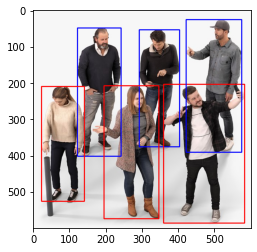

In [13]:
dimg = img.copy()
dimg = draw_results(dimg,human['bboxes'],human['genders']) #female_color=(255,0,0), male_color=(0,0,255)
plt.imshow(dimg)

### type 2. inference model

In [14]:
for box in bboxes:
    cimg = img.copy()
    crop_person = crop_box(cimg,box)
    
    out = gender_model.infer_image(crop_person)[0]
    pred = np.argmax(out)
    pred_str = gender_model.labels[pred]
    
    print(pred, pred_str)

1 male
1 male
0 female
0 female
0 female
1 male


### type 3. draw detection model, gender model

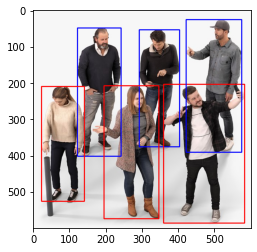

In [15]:
dimg = draw_detect_infer(img,detection_model,gender_model)
plt.imshow(dimg)

### type 4. draw bboxes, gender model

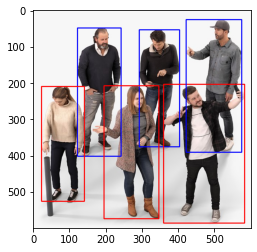

In [16]:
dimg = draw_detect_bboxes(img,bboxes,gender_model)
plt.imshow(dimg)

# Pose Example

In [17]:
pose_name = 'vitpose'
pose_path = "Human/Models/pose/vitpose-b-multi-coco.onnx"
#pose_path = "Human/Models/pose/vitpose-b-multi-coco.v8.trt"

# img size (256,192)(h,w) / dataset coco / use_udp True
pose_model = get_pose_model(pose_name, pose_path)

providers: ['CUDAExecutionProvider']
vitpose onnx loaded


### type 1. human class

In [18]:
human = get_pose(pose_model,img,human,use_tracking=False)

In [19]:
human.keys()

dict_keys(['bboxes', 'scores', 'labels', 'genders', 'genders_str', 'pose', 'pose_score'])

In [20]:
dimg = img.copy()
dimg = draw_pose_human(img,human)

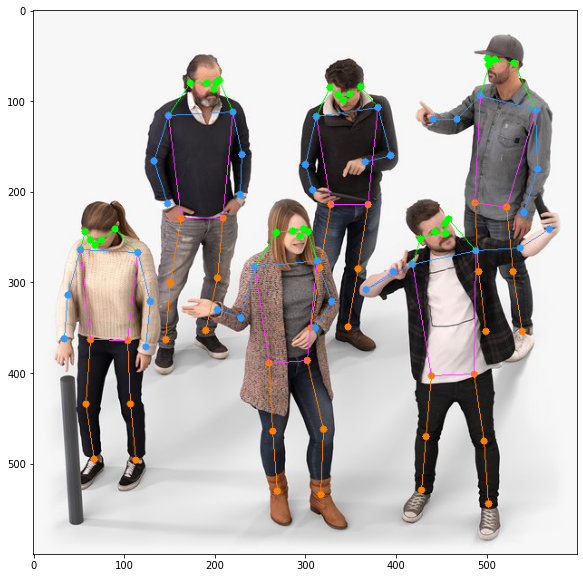

In [21]:
plt.figure(figsize=(10,10))
plt.imshow(dimg)

### type 2. inference model

In [22]:
results = pose_model.infer(img,bboxes,scores)
# results = [keypoint1,scores1,.......]

In [23]:
dimg = draw_pose(img,results)

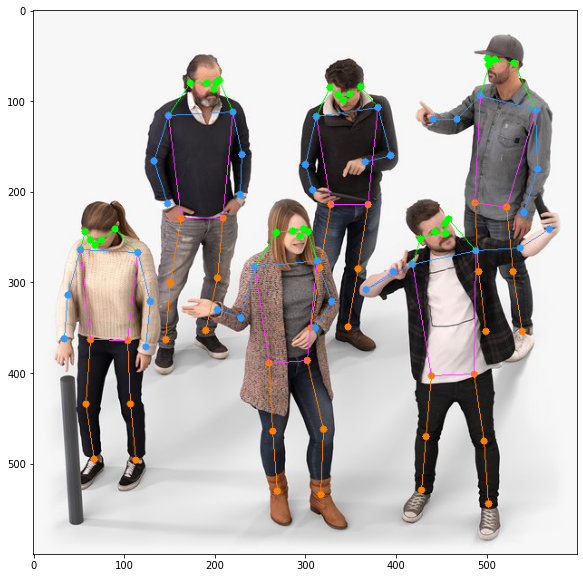

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(dimg)

# Tracking Example ( MOT )

In [25]:
# default params
aspect_ratio_thresh=1.6
min_box_area=10
track_thresh=0.5
track_buffer=60
match_thresh=0.8
mot20=False
frame_rate=30

# tracker = ByteTracker(aspect_ratio_thresh = aspect_ratio_thresh ,
#                               min_box_area = min_box_area,
#                               track_thresh = track_thresh,
#                               track_buffer = track_buffer,
#                               match_thresh = match_thresh,
#                               mot20 = mot20,
#                               frame_rate=frame_rate)

tracker = ByteTracker()

tracker init


### type 1. human class

In [ ]:
human = get_tracking(tracker,img,human,return_type=3,need_init=True)

In [27]:
human.keys()

dict_keys(['bboxes', 'scores', 'labels', 'genders', 'genders_str', 'pose', 'pose_score', 'tracking_image', 'tracking_bboxes', 'tracking_ids', 'tracking_scores'])

In [28]:
human.pose[0][:5]

array([[342.6265  ,  99.64354 ],
       [349.10754 ,  92.63817 ],
       [336.20816 ,  93.10472 ],
       [361.54764 ,  84.395065],
       [327.86514 ,  85.89497 ]], dtype=float32)

### type 1-1. human class -> tracking -> pose

In [29]:
human = get_pose(pose_model,img,human,use_tracking=True) # -> box format auto xywh 

In [30]:
human.pose[0][:5]

array([[342.25577 ,  99.69557 ],
       [348.78378 ,  92.90877 ],
       [335.97635 ,  93.22371 ],
       [361.26614 ,  84.542496],
       [327.85373 ,  86.05513 ]], dtype=float32)

In [31]:
dimg = img.copy()
dimg = draw_pose_human(img,human)

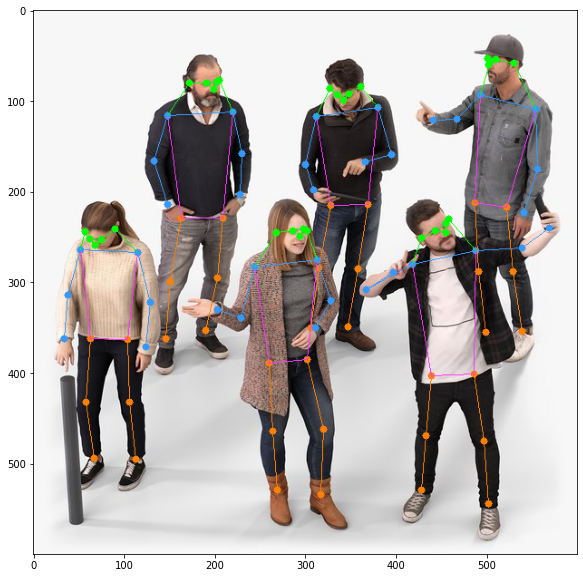

In [32]:
plt.figure(figsize=(10,10))
plt.imshow(dimg)

### type 2. image infer , detection model

In [44]:
# return_type
# 1 : dimg
# 2 : online_tlwhs, online_ids, online_scores, results
# 3 : online_tlwhs, online_ids, online_scores, results, dimg

# draw plot params : default
# draw_info (frame,fps,num) : True
# draw_box : True
# draw_id : True
# draw_blur : False (tracking box blur)
# min_size : 15 ( if box_w<min_size or box_h<min_size: continue )

dimg = tracker.dttrack(detection_model,img,return_type=1,toRGB=False,person=True,draw_id=False)

# tracker.init_tracker()
# online_tlwhs, online_ids, online_scores = tracker.dttrack(detection_model,img,return_type=2,toRGB=False,person=True)

# tracker.init_tracker()
# online_tlwhs, online_ids, online_scores, dimg = tracker.dttrack(detection_model,img,return_type=3,toRGB=False,person=True,draw_box=False)

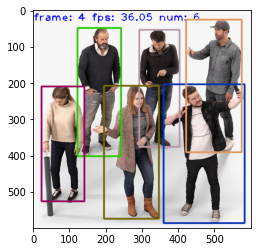

In [45]:
plt.imshow(dimg)

### type 3. image infer, bboxes

In [35]:
# draw_plot False -> get results
tracker.init_tracker()
online_tlwhs, online_ids, online_scores = tracker.track(img,bboxes,scores,return_type=2)

# draw_plot True -> get result image
# tracker.init_tracker()
# dimg = tracker.track(img,bboxes,scores,return_type=1)

tracker init


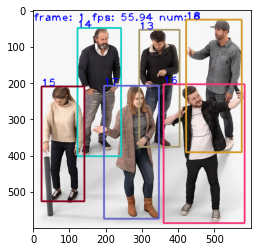

In [36]:
plt.imshow(dimg)

### type 4. video infer (save result)

In [ ]:
vid_path = "./tracker_sample.mp4"
save_path = "./example_tracking.mp4"

tracker.init_tracker()
tracking_video(vid_path,save_path,detection_model,tracker,person=True,toRGB=True)

### type 5. video infer (save result, draw + pose)

In [ ]:
vid_path = "./tracker_sample.mp4"
save_path = "./example_tracking_pose.mp4"

tracker.init_tracker()
tracking_video_pose(vid_path,save_path,detection_model,pose_model,tracker,person=True,toRGB=True)

### MOT eval ( save result txt -> mota )

In [39]:
from totalhuman.eval.mot import get_eval, print_mota

In [ ]:
data_dir = "mix_det/mot/"
json_file = "mix_det/mot/annotations/train.json"
result_base = './mot_eval/'
save_name='example_test'


## default params
# detection param
img_size=(640,640)
stride=32

# tracker param for eval
aspect_ratio_thresh=1.6
min_box_area=100
conf=0.001
nmsthre=0.65
batch_size=1
seed=None
track_thresh=0.6
track_buffer=30
match_thresh=0.9
mot20=False
##

# eval_result = get_eval(detection_name, detection_model, data_dir,json_file, result_base, name='train',save_name=save_name, \
#                        stride=stride,img_size=img_size,aspect_ratio_thresh=aspect_ratio_thresh,min_box_area=min_box_area,conf=conf,nmsthre=nmsthre,batch_size=batch_size \
#                        seed=seed, track_thresh=track_thresh, track_buffer=track_buffer, match_thresh=match_thresh, mot20=mot20)
eval_result = get_eval(detection_name, detection_model, data_dir,json_file, result_base, save_name = save_name)
                       

In [38]:
gt_base = "mix_det/mot/train/"
result_folder = "./mot_eval/example_test/"
print_mota(gt_base, result_folder, mot20=mot20)

gt_files ['/data/shared/Human/HumanTracker/datasets/mix_det/mot/train/MOT17-13-DPM/gt/gt.txt', '/data/shared/Human/HumanTracker/datasets/mix_det/mot/train/MOT17-10-DPM/gt/gt.txt', '/data/shared/Human/HumanTracker/datasets/mix_det/mot/train/MOT17-05-DPM/gt/gt.txt', '/data/shared/Human/HumanTracker/datasets/mix_det/mot/train/MOT17-09-FRCNN/gt/gt.txt', '/data/shared/Human/HumanTracker/datasets/mix_det/mot/train/MOT17-11-SDP/gt/gt.txt', '/data/shared/Human/HumanTracker/datasets/mix_det/mot/train/MOT17-04-FRCNN/gt/gt.txt', '/data/shared/Human/HumanTracker/datasets/mix_det/mot/train/MOT17-09-SDP/gt/gt.txt', '/data/shared/Human/HumanTracker/datasets/mix_det/mot/train/MOT17-02-FRCNN/gt/gt.txt', '/data/shared/Human/HumanTracker/datasets/mix_det/mot/train/MOT17-02-DPM/gt/gt.txt', '/data/shared/Human/HumanTracker/datasets/mix_det/mot/train/MOT17-11-FRCNN/gt/gt.txt', '/data/shared/Human/HumanTracker/datasets/mix_det/mot/train/MOT17-09-DPM/gt/gt.txt', '/data/shared/Human/HumanTracker/datasets/mix_d